Для 61 большого города в Англии и Уэльсе известны средняя годовая смертность на 100000 населения (по данным 1958–1964) и концентрация кальция в питьевой воде (в частях на миллион). Чем выше концентрация кальция, тем жёстче вода. Города дополнительно поделены на северные и южные.

water.txt

Постройте 95% доверительный интервал для средней годовой смертности в больших городах. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [13]:
data = pd.read_csv('water.txt',sep='\t')
data.shape

(61, 4)

In [14]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [15]:
data.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


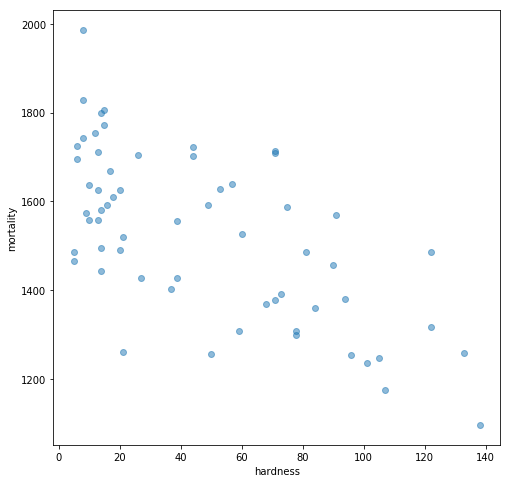

In [70]:

import matplotlib.pyplot as plt
plt.scatter(data['hardness'], data['mortality'], alpha=0.5)
plt.ylabel('mortality')
plt.xlabel('hardness')

plt.show()

In [66]:
m_mean = data['mortality'].mean()


In [67]:
m_std = data['mortality'].std(ddof=1)/sqrt(len(data))

In [68]:
from statsmodels.stats.weightstats import  _tconfint_generic

In [69]:
print  _tconfint_generic(m_mean, m_std,len(data)-1, 0.05, 'two-sided')

(1476.0833413552848, 1572.2117406119285)


На данных из предыдущего вопроса постройте 95% доверительный интервал для средней годовой смертности по всем южным городам. Чему равна его верхняя граница? Округлите ответ до 4 знаков после десятичной точки.


In [72]:
data_south = data.loc[data['location'] == 'South']

In [76]:
m_south_mean = data_south['mortality'].mean()


In [77]:
m_south_std = data_south['mortality'].std(ddof=1)/sqrt(len(data_south))

In [79]:
print  _tconfint_generic(m_south_mean, m_south_std,len(data_south)-1, 0.05, 'two-sided')

(1320.1517462936238, 1433.463638321761)


На тех же данных постройте 95% доверительный интервал для средней годовой смертности по всем северным городам. Пересекается ли этот интервал с предыдущим? Как вы думаете, какой из этого можно сделать вывод?

In [80]:
data_north = data.loc[data['location'] == 'North']

In [81]:
m_north_mean = data_north['mortality'].mean()
m_north_std = data_north['mortality'].std(ddof=1)/sqrt(len(data_north))
print  _tconfint_generic(m_north_mean, m_north_std,len(data_north)-1, 0.05, 'two-sided')

(1586.5605251961385, 1680.6394748038613)


Вспомним формулу доверительного интервала для среднего нормально распределённой случайной величины с дисперсией σ2:
$$\bar{X}_n\pm z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}$$

При σ=1 какой нужен объём выборки, чтобы на уровне доверия 95% оценить среднее с точностью ±0.1?

In [91]:
(1.96/0.1)*(1.96/0.1)

384.1599999999999

http://baguzin.ru/wp/opredelenie-obema-vyborki/   - формула определения выборки тут